# House Price Analytics

## 04 Data analysis for generating insights for seller

**Project:** Code Institute – Capstone Project

---
### **Objectives**
- Load the final house dataset
- Set datatypes
- Hypothesis analysis
- Diagnostic analysis 

### **Inputs**
- `data/processed/final_house_data.csv`

### **Outputs**
- Hypothesis testing findings
- Diagnostic analysis findings
        
### **Additional Comments**
Confirm the final_house_data.csv is exisit under outputs/datasets. Run this notebook top-down.

---

### Setup the file and Load the Dataset
Import nesessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats
import warnings 
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

Set the home directory. Need to change the working directory from its current folder to its parent folder. Access the current directory with os.getcwd()

In [3]:
PROJECT_DIR = os.path.join(os.getcwd()) # Define the project root directory
os.chdir(PROJECT_DIR) # Change the current working directory
print("Working directory:", os.getcwd()) 

Working directory: c:\MyStuff\CodeInstitute\Projects\ci-project-02\Home-Value-Analysis\notebooks


Load the data from the original data set reside within data directory under data/processed/ directory.

In [4]:
# LOAD DATASET
try:
    # Data directory paths
    data_path = os.path.join("..", "data", "processed")
    # Extract the original dataset
    df = pd.read_csv(os.path.join(data_path, "final_house_data.csv"))
    print("Dataset loaded successfully.")
except Exception as e:
    print(e)
    print("Error loading the dataset.")
    df = pd.DataFrame()  # Create an empty DataFrame if loading fails

print(f"Original dataset shape: {df.shape}")

Dataset loaded successfully.
Original dataset shape: (21596, 31)


Ensure Data Types (Critical Step)

In [5]:
# Ensure Data Types
categorical_cols = ['waterfront', 'view', 'condition', 'grade', 'zipcode', 'is_renovated', 'age_group', 'sale_month_name']
for col in categorical_cols:
    df[col] = df[col].astype('category')
    
# Ensure sale_month is ordered correctly for plots
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['sale_month_name'] = pd.Categorical(df['sale_month_name'], categories=month_order, ordered=True)

print("Data Types Set and data ready for analysis.")

Data Types Set and data ready for analysis.


---

### Seasonality Analysis (Timing)

**Timing Analysis**: Best Month to Sell 

USER STORY | Timing : 
    As a Seller,
    I want to identify the best month of the year to sell a house,
    So that I can list my property at the optimal time to maximize profit.


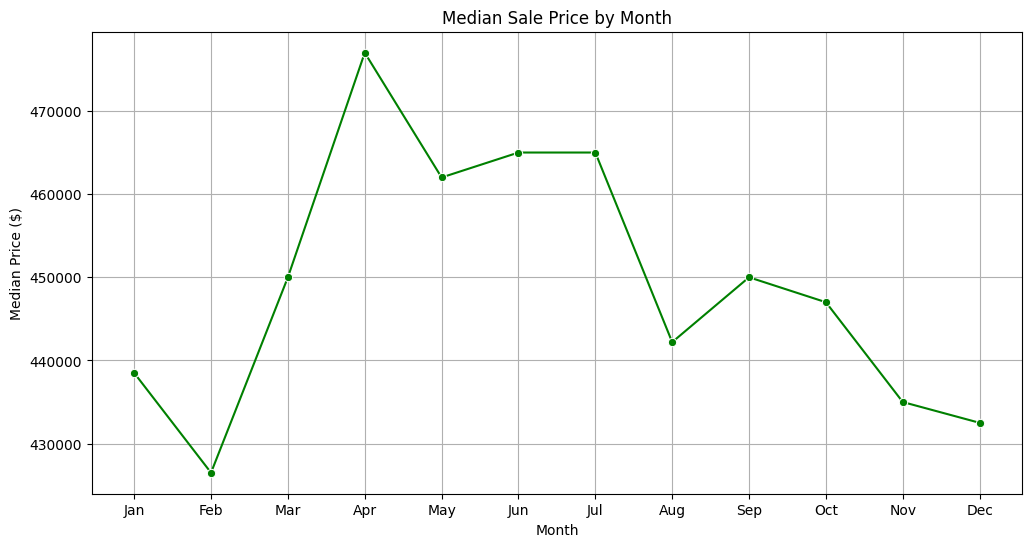

In [6]:
# Using Seaborn as when plotting "Price by Month," Seaborn automatically aggregates the data by month.
# Visualizing Seasonality
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='sale_month_name', y='price', estimator=np.median, errorbar=None, marker='o', color='green')
plt.title('Median Sale Price by Month')
plt.ylabel('Median Price ($)')
plt.xlabel('Month')
plt.grid(True)
plt.show()

**Hypothesis (H3):** There is a statistically significant difference in closing prices based on the month of sale.
- Null Hypothesis: All 12 months have the same median closing price.
- Alternative Hypothesis: At least one month has a different median closing price than the others.

**Test:** Kruskal-Wallis Test (Comparing > 2 groups on non-normal data).

In [7]:
# Statistical Test (Kruskal-Wallis)
# Test if the distributions of price differ across months
kw_result = pg.kruskal(data=df, dv='price', between='sale_month_name')
print("--- Kruskal-Wallis Test Results ---")
print(kw_result)

--- Kruskal-Wallis Test Results ---
                  Source  ddof1          H         p-unc
Kruskal  sale_month_name     11  71.827786  5.481667e-11


**Findings:**
* **Visual:** Prices typically peak in Spring/Summer (April-June).
* **Statistical:** If p-value < 0.05, the seasonal difference is real. 
    - p-value (p-unc) is far less than 0.05 (or any common significance threshold like 0.01). 
    - Therefore, it's possible to confidently reject the null hypothesis (H₀).
    - Sellers should aim to list in Q2.